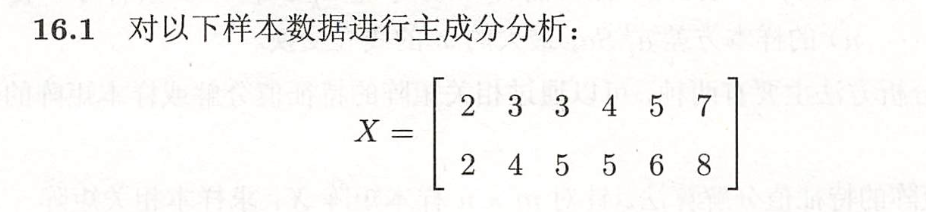

In [2]:
import numpy as np

In [3]:
X = np.array([[2,3,3,4,5,7],[2,4,5,5,6,8]])

In [3]:
# do PCA for X
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) # output explained variance ratio
print(pca.singular_values_) # output singular values
print(pca.components_) # output principal components


[1.00000000e+00 7.85902804e-33]
[2.00000000e+00 1.77302319e-16]
[[-8.86511593e-17 -3.53553391e-01 -7.07106781e-01 -3.53553391e-01
  -3.53553391e-01 -3.53553391e-01]
 [ 1.00000000e+00  7.90939352e-18  1.58187870e-17  7.90939352e-18
   7.90939352e-18  7.90939352e-18]]


In [4]:
# PCA 的手动实现
# 1. 去中心化
X_mean = np.mean(X, axis=1)
X_center = X - X_mean.reshape(-1,1)
# 2. 计算协方差矩阵
X_cov = np.cov(X_center)
# 3. 计算协方差矩阵的特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(X_cov)
# 4. 选择主成分
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)
# 5. 降维
feature = np.array([eig_pairs[i][1] for i in range(2)])
X_new = np.dot(feature, X_center)
print(X_new)


[[ 3.57085518  1.41178986  0.66451439  0.         -1.41178986 -4.23536958]
 [-0.49899224  0.08276108  0.74727547  0.         -0.08276108 -0.24828323]]
